In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
avo=pd.read_csv('avocado.csv')
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avo.shape

(18249, 14)

# PERFORMING EDA

In [4]:
#The dataset can have 2 different outputs in separate models:
#1.Classification- output region
#2.Regression - Average Price

In [5]:
#creating a data frame
avo = pd.DataFrame(avo)
avo

#total of 18249 rows and 14 columns

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
#dropping the unnamed column that holds non relevant data
avoc=avo.drop(['Unnamed: 0', 'Date'], axis = 1)

In [7]:
avoc.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
avoc.shape

(18249, 12)

In [9]:
#to find the type of the dataset
type(avoc)
#the dataset type is data frame

pandas.core.frame.DataFrame

In [10]:
avoc.info()
#It gives the information about the data that there are total 18249 rows and 13 columns.
#The data types used are float64, int64, object
#region has object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [11]:
avoc.columns
#showing list of all the column names

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [12]:
#using label encoder for object data types- Type & Region

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [14]:
avoc['type']=le.fit_transform(avoc['type'])


In [15]:
avoc['type'].value_counts()

#0 - conventional type avocado - 9126
#1- organic type avocado- 9123

0    9126
1    9123
Name: type, dtype: int64

C:\Users\KirtiArya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

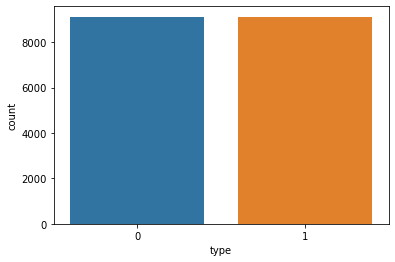

In [16]:
sns.countplot(avoc['type'])

In [17]:
#the conventional type avocado are encoded as 0 and are 9126 in number
#the organic type avocado are encoded as 1 and are 9123 in number

In [18]:
avoc['region']=le.fit_transform(avoc['region'])

In [19]:
avoc['region'].value_counts()

#we can see that the data is balanced. Hence we dont need to balance the output data.

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
6     338
47    338
53    335
Name: region, dtype: int64

C:\Users\KirtiArya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

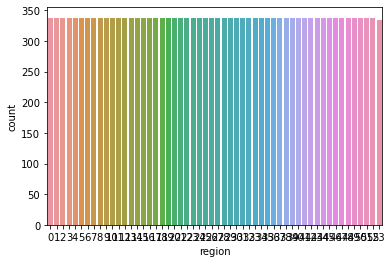

In [20]:
sns.countplot(avoc['region'])

#showing the balanced data using the graph.

In [21]:
avoc.head()

#the entire data is converted into numeric data now.

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [22]:
avoc.shape

(18249, 12)

In [23]:
#checking for null values
avoc.isnull().sum()

#there are no null values in dataset

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

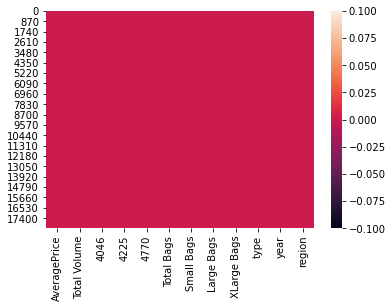

In [24]:
sns.heatmap(avoc.isnull())

#the plot shows no null values since no white spaces present.

In [25]:
# to check if any space or blank Value is present
avoc.loc[avoc['region']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [26]:
avoc.loc[avoc['AveragePrice']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [27]:
avoc.loc[avoc['Total Volume']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [28]:
avoc.loc[avoc['4046']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [29]:
avoc.loc[avoc['4225']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [30]:
avoc.loc[avoc['4770']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [31]:
avoc.loc[avoc['Total Bags']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [32]:
avoc.loc[avoc['Small Bags']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [33]:
avoc.loc[avoc['Large Bags']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [34]:
avoc.loc[avoc['XLarge Bags']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [35]:
avoc.loc[avoc['type']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [36]:
avoc.loc[avoc['year']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


In [37]:
#there is no space or blank values in the dataset

In [38]:
avoc.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


In [39]:
avoc.dtypes
#verifying all data type is numeric

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [40]:
#checking for outliers

<AxesSubplot:>

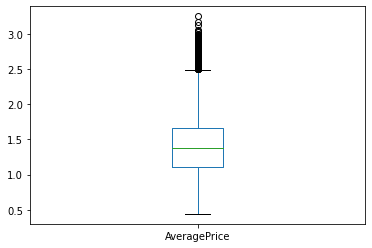

In [41]:
avoc['AveragePrice'].plot.box()

#there are no outliers

<AxesSubplot:>

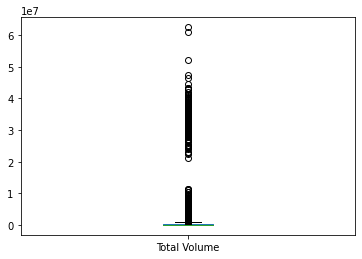

In [42]:
avoc['Total Volume'].plot.box()
#few outliers present

<AxesSubplot:>

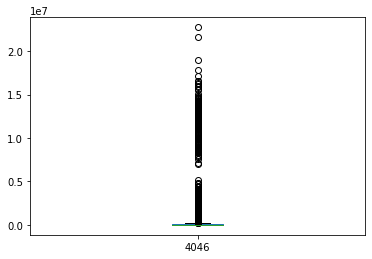

In [43]:
avoc['4046'].plot.box()
#not much outliers present

<AxesSubplot:>

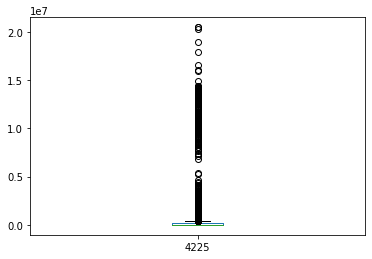

In [44]:
avoc['4225'].plot.box()
#no outliers present

<AxesSubplot:>

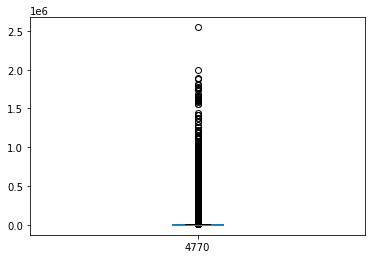

In [45]:
avoc['4770'].plot.box()
#some outliers present

<AxesSubplot:>

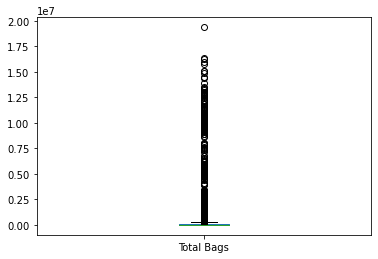

In [46]:
avoc['Total Bags'].plot.box()
#few outliers present

<AxesSubplot:>

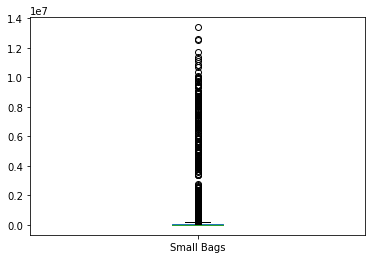

In [47]:
avoc['Small Bags'].plot.box()
#no outliers

<AxesSubplot:>

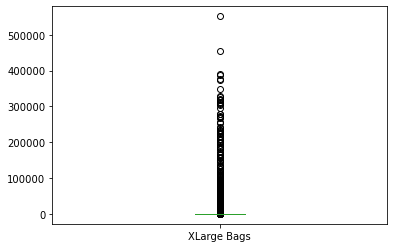

In [48]:
avoc['XLarge Bags'].plot.box()
#some outliers are present

<AxesSubplot:>

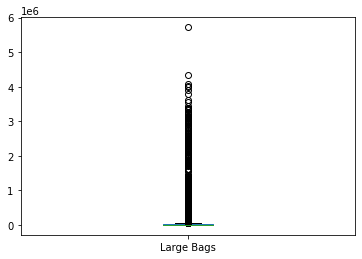

In [49]:
avoc['Large Bags'].plot.box()
#some outliers are present

AveragePrice       AxesSubplot(0.125,0.749828;0.227941x0.130172)
Total Volume    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
4046            AxesSubplot(0.672059,0.749828;0.227941x0.130172)
4225               AxesSubplot(0.125,0.593621;0.227941x0.130172)
4770            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Total Bags      AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Small Bags         AxesSubplot(0.125,0.437414;0.227941x0.130172)
Large Bags      AxesSubplot(0.398529,0.437414;0.227941x0.130172)
XLarge Bags     AxesSubplot(0.672059,0.437414;0.227941x0.130172)
type               AxesSubplot(0.125,0.281207;0.227941x0.130172)
year            AxesSubplot(0.398529,0.281207;0.227941x0.130172)
region          AxesSubplot(0.672059,0.281207;0.227941x0.130172)
dtype: object

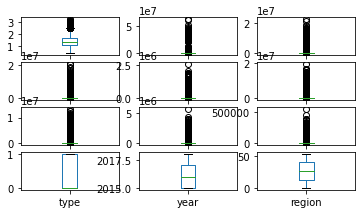

In [50]:
#plotting the plot all together
avoc.plot(kind='box', subplots=True, layout=(5,3))

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(avoc))
z.shape

(18249, 12)

In [52]:
threshold=3
print(np.where(z>3))
# the displayed value in the row and column is the values where the outliers are present 

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [53]:
#total number of outliers presnt are:
len(np.where(z>3)[0])

#there are total 1773 outliers present

1773

In [54]:
#dropping the outliers
avoc_new=avoc[(z<3).all(axis=1)]
avoc_new


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [55]:
print("old data frame ", avoc.shape)
print("new data frame ", avoc_new.shape)
print("total dropped rows ", avoc.shape[0]- avoc_new.shape[0])

old data frame  (18249, 12)
new data frame  (17651, 12)
total dropped rows  598


In [56]:
#data loss percent
loss_percent = ((18249-17651)/18249)*100
loss_percent


#3.27% data is removed after removing outliers

3.276891884486821

In [ ]:
#checking for skewness

In [ ]:
avoc_new.skew()
#skewnness can be seen in many columns like 
#total volume, 4046, 4225, 4770, small bags, total bags, large bags, xlarge bags

In [ ]:
#show skewness using the plot
avoc_new.plot(kind='density', subplots=True, layout=(6,11), sharex= False, legend= True, fontsize=1, figsize=(18,12))
plt.show()

#we can see mostly the data is normally distributed and there is a little skewness in columns:
#Runs scored, hits, errors, shout out, complete games.

In [ ]:
#plotting the columns with most skewness
avoc_new['Total Volume'].plot.hist()

#data is higly right skewed

In [ ]:
avoc_new['4225'].plot.hist()

#data is higly right skewed

In [ ]:
avoc_new['4046'].plot.hist()

#data is higly right skewed

In [ ]:
avoc_new['4770'].plot.hist()

#data is higly right skewed

In [ ]:
avoc_new['Small Bags'].plot.hist()

#data is higly right skewed

In [ ]:
avoc_new['Large Bags'].plot.hist()

#data is higly right skewed

In [ ]:
avoc_new['XLarge Bags'].plot.hist()

#data is higly right skewed

# Keeping "region" as the target variable- Classification

In [ ]:
avoc_new.head()

In [ ]:
#separating the data set into input & output data

#input data
x= avoc_new.iloc[:,0:11]
x

In [ ]:
#output data
y= avoc_new.iloc[:, 11:]
y

In [ ]:
#removing the skewness
from sklearn.preprocessing import power_transform
#doing power transform
x=power_transform(x, method='yeo-johnson')
x

In [ ]:
#performing data scaling 
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x= scale.fit_transform(x)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
scaled=scale.fit_transform(x)
x=scaled
x

In [ ]:
#Checking Correlation 
avoc_new.corr()

In [ ]:
#making correlation matrix with 'region'
corr_matrix=avoc_new.corr()
corr_matrix['region'].sort_values(ascending=False)
#there is not much correlation of input variables with the 'region'

In [ ]:
#heatmap for correlation
corr_hmap= avoc_new.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_hmap, annot=True, linewidths=0.9, linecolor="white", fmt='.2f')
plt.show()

#not a good correlation between region and other variables, but there is a lot of multicollinearity
#multicolinearity is present between columns:
#total bags, small bags
#small bag, 4225
#large bags, total bags
#total volume, type


In [ ]:
avoc_new.shape

In [ ]:
#number of columns
x.shape[1] 

In [ ]:
#checking the multicollinearity & removing it
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#finding vif for each column
def calc_vif(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF Factor']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [ ]:
x.shape

In [ ]:
calc_vif(avoc_new)

#we can see that there is high multicolinearity. Hence using PCA to remove it.

In [ ]:
#clubbing the columns to remove multicolinearity.
from sklearn.decomposition import PCA
pca= PCA(n_components=9) #making the input columns = 9
xpca=pca.fit_transform(x)
x=xpca

In [ ]:
x

In [ ]:
x=pd.DataFrame(x)
x

In [ ]:
y

# Classification Models

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=84)

Hyper parameter Tuning

In [ ]:
grid_param = {'criterion':['gini', 'entropy']}

In [ ]:
gd_sr= GridSearchCV(estimator= dtc,param_grid = grid_param, scoring= 'accuracy', cv= 5)

In [ ]:
gd_sr.fit(x_train,y_train)

In [ ]:
best_paramters= gd_sr.best_params_
print(best_paramters)
best_result = gd_sr.best_score_
print(best_result)

#the best parameter is entropy

Model training & predicting

In [ ]:
dtc= DecisionTreeClassifier(criterion ='entropy')
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)
preddtc=dtc.predict(x_test)

In [ ]:
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

In [ ]:
#Accuracy of Model is 73%. There are various errors.

Cross validation

In [ ]:
#cross validating K fold
from sklearn.model_selection import cross_val_score
score= cross_val_score(dtc, x, y, cv=5)
print(score.mean())
print(score)

#by cross validation it shows that the model accuracy is 40%

# K Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=37)

Hyper Parameter Tuning

In [ ]:
grid_param = {'n_neighbors':[3,5,11,19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

In [ ]:
gd_sr= GridSearchCV(estimator= knn, param_grid = grid_param, verbose=1, cv=3, n_jobs= -1)

In [ ]:
gd_sr.fit(x_train,y_train)

In [ ]:
best_paramters= gd_sr.best_params_
print(best_paramters)
best_result = gd_sr.best_score_
print(best_result)

In [ ]:
#the best parameters are n_neighnors=5, weights = distance, metric = manhattan

Model training & predicting

In [ ]:
knn= KNeighborsClassifier()
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights= 'distance')
knn.fit(x_train, y_train)
p=knn.predict(x_test)
ac=accuracy_score(y_test, p)
round(ac, 3)

In [ ]:
#the accuracy of model is 88%

Cross validation

In [ ]:
#cross validating K fold
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights= 'distance')
score= cross_val_score(knn, x, y, cv=5)
print(score.mean())
print(score)

#by cross validation it shows that the model accuracy is 52%

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
mnb= GaussianNB()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30, random_state= 79)

Hyper Parameter Tuning

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
gd_sr = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [ ]:
gd_sr.fit(x_train,y_train)

In [ ]:
best_paramters= gd_sr.best_params_
print(best_paramters)
best_result = gd_sr.best_score_
print(best_result)

In [ ]:
#the best parameters = var_smoothing = 0.0002

Model training & predicting

In [ ]:
mnb= GaussianNB(var_smoothing = 0.0002)
mnb.fit(x_train, y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test, predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test, predmnb))

In [ ]:
#accuracy is less just 43%

Cross Validation

In [ ]:
#cross validating K fold
from sklearn.model_selection import cross_val_score
score= cross_val_score(mnb, x, y, cv=5)
print(score.mean())
print(score)

#by cross validation it shows that the model accuracy is 31%

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC 
svc=SVC()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=46)

Hyper Parameter Tuning

In [ ]:
param_grid = {'C': [1, 10],'kernel': ['rbf', 'poly', 'linear']}

In [ ]:
grid_sr = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_sr.fit(x_train,y_train)

In [ ]:
best_paramters= grid_sr.best_params_
print(best_paramters)
best_result = grid_sr.best_score_
print(best_result)

In [ ]:
#the best parameter is kernel = rbf anf C= 10

Model training & predicting

In [ ]:
svc=SVC(kernel='rbf', C=10)
svc.fit(x_train, y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

In [ ]:
#the accuracy of the model is 88%

Cross Validation

In [ ]:
#cross validating K fold
from sklearn.model_selection import cross_val_score
score= cross_val_score(svc, x, y)
print(score.mean())
print(score)


In [ ]:
#the mean accuracy is 64% 

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd= RandomForestClassifier()

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=42)

Training & Predicting Model

In [ ]:
rnd= RandomForestClassifier()
rnd.fit(x_train, y_train)
predrnd=rnd.predict(x_test)
print(accuracy_score(y_test, predrnd))
print(confusion_matrix(y_test,predrnd))
print(classification_report(y_test, predrnd))


In [ ]:
#The model accuracy is = 88%

Cross Validation

In [ ]:
#cross validating K fold
from sklearn.model_selection import cross_val_score
score= cross_val_score(rnd, x, y, cv=5)
print(score.mean())
print(score)

#the mean accuracy = 58%

# Conclusion:

In [ ]:
Decision Tree- 73%, cross validation - 40%
KNeighbor - 88%, cv=52%
Naive Bayes- 43% , cv =31%
Support Vector - 88%, cv = 64%
Random Forest - 88%, cv = 58%

The best model is Support Vector Classifier with 88% (Minimum difference between cross val score & accuracy)

# Saving Model

In [ ]:
#saving Data Frame
project_avo=pd.DataFrame(predsvc)
project_avo.to_csv("poject_avo_svc.csv")

In [ ]:
#saving model
import pickle

file_avo = 'project_avo_svc.pkl'
pickle.dump(svc, open(file_avo, 'wb'))

In [ ]:
#load model from disk
model_svc = pickle.load(open(file_avo, 'rb'))

In [ ]:
#model prediction
result_svc = model_svc.score(x_test, y_test)
print(result_svc)

#Prediction is correct upto 90%

# Target- Average Price- Regression Model

In [57]:
avoc_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [58]:
#separating the data set into input & output data

#input data
x= avoc_new.iloc[:,1:12]
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [59]:
#output data
y= avoc_new.iloc[:, 0:1]
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
18244,1.63
18245,1.71
18246,1.87
18247,1.93


In [60]:
#removing the skewness
from sklearn.preprocessing import power_transform
#doing power transform
x=power_transform(x, method='yeo-johnson')
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -1.01904715,
        -1.2106467 , -2.01058988],
       [-0.14749743, -0.77717852,  0.26951276, ..., -1.01904715,
        -1.2106467 , -2.01058988],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -1.01904715,
        -1.2106467 , -2.01058988],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  0.98130886,
         1.97870686,  1.57828237],
       [-0.70179733, -0.54701087, -0.71637127, ...,  0.98130886,
         1.97870686,  1.57828237],
       [-0.66738095, -0.35967077, -0.79165015, ...,  0.98130886,
         1.97870686,  1.57828237]])

In [61]:
#performing data scaling 
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x= scale.fit_transform(x)

In [62]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
scaled=scale.fit_transform(x)
x=scaled
x

array([[0.55893336, 0.35498056, 0.57757163, ..., 0.        , 0.        ,
        0.        ],
       [0.54510426, 0.32886287, 0.5614532 , ..., 0.        , 0.        ,
        0.        ],
       [0.61275241, 0.33876453, 0.63618871, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.42481659, 0.36358503, 0.35516323, ..., 1.        , 1.        ,
        1.        ],
       [0.43889538, 0.37905957, 0.36746539, ..., 1.        , 1.        ,
        1.        ],
       [0.44548987, 0.41991611, 0.35265312, ..., 1.        , 1.        ,
        1.        ]])

In [63]:
#Checking Correlation 
avoc_new.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,0.091704,-0.003242
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,-0.004866,0.076676
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,-0.034636,0.119067
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,-0.040234,0.011002
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.082054,-0.095972
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.103442,0.085892
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.086639,0.065976
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.119543,0.127635
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,0.108209,-0.044338
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.003867,0.018409


In [64]:
#making correlation matrix with 'Average Price'
corr_matrix=avoc_new.corr()
corr_matrix['AveragePrice'].sort_values(ascending=False)
#there is not much correlation of input variables with the 'Average Price' except type

AveragePrice    1.000000
type            0.613150
year            0.091704
region         -0.003242
XLarge Bags    -0.152669
4770           -0.243465
4225           -0.243988
Large Bags     -0.270915
Small Bags     -0.275771
Total Bags     -0.297323
Total Volume   -0.332056
4046           -0.333577
Name: AveragePrice, dtype: float64

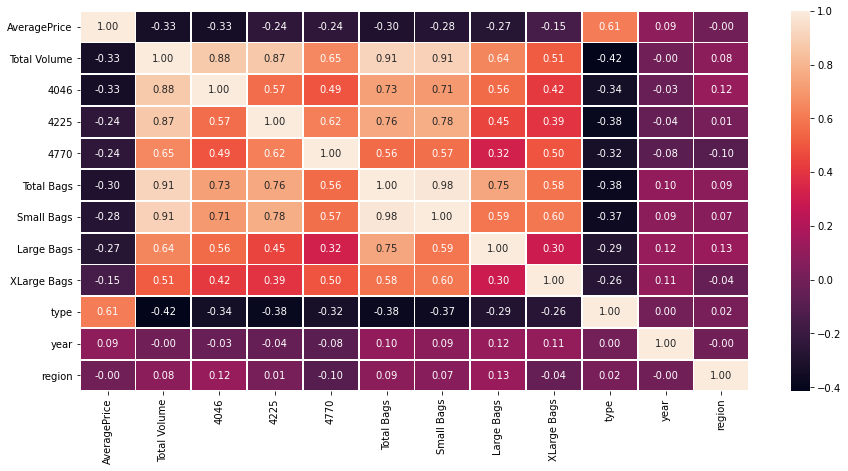

In [65]:
#heatmap for correlation
corr_hmap= avoc_new.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_hmap, annot=True, linewidths=0.9, linecolor="white", fmt='.2f')
plt.show()

#not a good correlation between Average Price and other variables, but there is a lot of multicollinearity
#multicolinearity is present between columns:
#total bags, small bags
#total volume, 4225
#large bags, total bags
#total volume, 4046

In [66]:
avoc_new.shape

(17651, 12)

In [67]:
#number of columns
x.shape[1] 

11

In [68]:
#checking the multicollinearity & removing it
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
#finding vif for each column
def calc_vif(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF Factor']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return(vif)

In [70]:
x.shape

(17651, 11)

In [71]:
calc_vif(avoc_new)
#high multicolinearity

,variables,VIF Factor
0,AveragePrice,2.398199e+01
1,Total Volume,4.976834e+08
2,4046,8.726684e+07
3,4225,7.503502e+07
4,4770,5.280831e+05
5,Total Bags,2.333471e+13
6,Small Bags,1.518921e+13
7,Large Bags,1.478044e+12
8,XLarge Bags,7.091814e+09
9,type,3.665187e+00


In [180]:
#clubbing the columns to 10 input columns in total.
from sklearn.decomposition import PCA
pca= PCA(n_components=10) #making the input columns = 10
xpca=pca.fit_transform(x)
x=xpca

In [181]:
x

array([[ 0.0466384 , -0.56483752, -0.57359149, ..., -0.10949277,
         0.04794148, -0.00403518],
       [ 0.0423696 , -0.56367131, -0.57805362, ..., -0.12095111,
         0.0237207 , -0.0046057 ],
       [ 0.09681837, -0.58005827, -0.55749065, ..., -0.14225409,
         0.09330148,  0.01419049],
       ...,
       [-0.52857082,  0.51941816,  0.46091357, ...,  0.06134894,
         0.0067877 , -0.00173042],
       [-0.51254078,  0.52048756,  0.47111398, ...,  0.06035287,
         0.00847874, -0.00074625],
       [-0.54317386,  0.52987308,  0.46298297, ...,  0.08029086,
         0.00549423,  0.00305333]])

In [182]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9
0,0.046638,-0.564838,-0.573591,0.367274,0.254054,-0.113623,0.040530,-0.109493,0.047941,-0.004035
1,0.042370,-0.563671,-0.578054,0.365544,0.256826,-0.109015,0.015056,-0.120951,0.023721,-0.004606
2,0.096818,-0.580058,-0.557491,0.388524,0.220393,-0.061402,0.004011,-0.142254,0.093301,0.014190
3,0.062194,-0.572482,-0.566650,0.372977,0.237296,-0.112151,0.008658,-0.099274,0.091698,-0.000446
4,0.049458,-0.566023,-0.569919,0.368562,0.238884,-0.133518,-0.021782,-0.084718,0.051424,-0.012466
...,...,...,...,...,...,...,...,...,...,...
17646,-0.682441,0.627014,0.455861,-0.008791,0.233373,0.026788,0.084316,0.006925,-0.015400,-0.016143
17647,-0.698579,0.620085,0.441212,-0.018608,0.248129,0.033928,0.061969,-0.028718,0.039411,-0.030457
17648,-0.528571,0.519418,0.460914,0.008973,0.201739,0.430019,-0.243667,0.061349,0.006788,-0.001730
17649,-0.512541,0.520488,0.471114,0.018199,0.187989,0.430772,-0.226688,0.060353,0.008479,-0.000746


In [183]:
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
18244,1.63
18245,1.71
18246,1.87
18247,1.93


# Regression Models

# Linear Regression

In [76]:
#importing the libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


In [77]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.33, random_state=44)

In [78]:
x_train.shape

(11826, 10)

In [79]:
x_test.shape

(5825, 10)

In [80]:
y_train.shape

(11826, 1)

In [81]:
y_test.shape

(5825, 1)

In [82]:
lm=LinearRegression()

In [83]:
lm.fit(x_train, y_train) 

LinearRegression()

In [84]:
lm.coef_

array([[-0.3076089 ,  0.18120665, -0.04967049, -0.16721862, -0.00960563,
         0.50229628, -0.14153865, -0.3799334 ,  0.66472008, -2.54819035]])

In [85]:
lm.intercept_

array([1.40373979])

In [88]:
lm.score(x_train, y_train)

#the accuracy is 53%

0.5311327836675794

In [89]:
predlm=lm.predict(x_test)

In [90]:
print("predicted wins:", predlm)
print("actual wins: ", y_test)

predicted wins: [[1.77411057]
 [1.68171568]
 [1.5819173 ]
 ...
 [1.30917122]
 [1.40099998]
 [1.49973619]]
actual wins:         AveragePrice
12935          1.96
10207          1.86
18190          1.19
7738           1.20
12753          1.24
...             ...
3351           1.18
13319          1.45
7824           1.18
11779          1.53
17790          1.41

[5825 rows x 1 columns]


In [91]:
print('The Error:')
print("mean absolute error:", mean_absolute_error(y_test,predlm))
print("mean squared error:", mean_squared_error(y_test,predlm))
print("root mean square error:", np.sqrt(mean_squared_error(y_test,predlm)))

The Error:
mean absolute error: 0.2115421897538045
mean squared error: 0.07222185719323738
root mean square error: 0.2687412457983281


In [97]:
#predict 'Average Price' by giving inputs- 

t= np.array([407, 12000, 45000, 12500, 4740, 45045, 1200, 2015, 7700, 8222])

In [98]:
t.shape

(10,)

In [99]:
t=t.reshape(1,-1)

In [100]:
t.shape

(1, 10)

In [101]:
lm.predict(t)

#The predicted value of 'Average Price' for the given set of input values is as follows.

array([[3537.39863365]])

# Model Lasso- L1

In [103]:
#lasso Grid Search
#create and fit a Lasso regression model
model= Lasso()

Hyper Paramater Tuning

In [104]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.30, random_state=45)

In [105]:
#prepare a range of alpha values to test
alphavalue= {'alpha':[1, 0.1, 0.01, 0.001, 0.0001, 0]}

In [106]:
grid= GridSearchCV(estimator= model, param_grid=alphavalue)
grid.fit(x_train, y_train)
print(grid)

C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.489e+02, tolerance: 1.457e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})


In [108]:
#summarize results of grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

#best value of alpha= 0

0.5233737091960748
0
{'alpha': 0}


In [109]:
#model
ls= Lasso(alpha= 0) #Keeping the best value of alpha = 1
ls.fit(x_train, y_train)

<ipython-input-109-bc6e84f8a18c>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  ls.fit(x_train, y_train)
C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.376e+02, tolerance: 1.840e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0)

In [110]:
ls.coef_

array([-0.30740085,  0.1901467 , -0.0521743 , -0.15009432, -0.00330976,
        0.48604921, -0.13048785, -0.38788004,  0.68358948, -2.60799017])

In [111]:
ls.intercept_

array([1.40760038])

In [113]:
ls.score(x_train, y_train)
#accuracy is 52.43%

0.5243503037929593

In [114]:
predls=ls.predict(x_test)

In [115]:
print("predicted wins:", predls)
print("actual wins: ", y_test)

predicted wins: [1.25247804 1.55044864 1.38232936 ... 1.73899495 0.88355009 1.22475574]
actual wins:         AveragePrice
2467           1.16
13045          2.16
14684          1.23
8997           1.43
4237           0.93
...             ...
12132          1.84
6678           0.99
16823          1.90
1284           1.23
7525           1.33

[5296 rows x 1 columns]


In [120]:
#predict 'Average Price' by giving inputs- 

t= np.array([407, 12000, 45000, 12500, 4740, 45045, 1200, 2015, 7700, 8222])

In [121]:
t.shape

(10,)

In [122]:
t=t.reshape(1,-1)

In [123]:
t.shape

(1, 10)

In [124]:
ls.predict(t)

#The predicted value of 'Average Price' for the given set of input values is as follows.

array([2695.01169679])

# Model L2 -Ridge

In [126]:
#create and fit a ridge regression model
model= Ridge()

In [127]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.33, random_state=42)

Hyper Parameter Tunning

In [128]:
#prepare a range of alpha values to test
alphavalue= {'alpha':[1, 0.1, 0.01, 0.001, 0.0001, 0]}

In [129]:
grid= GridSearchCV(estimator= model, param_grid=alphavalue)
grid.fit(x_train, y_train)
print(grid)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})


In [130]:
#summarize results of grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

#best value of alpha =0.1

0.5252523964613113
0.01
{'alpha': 0.01}


In [132]:
#creating model
#Using Ridge
rd= Ridge(alpha= 0.01) #keeping the best value of alpha= 1
#rd.Ridge()

rd.fit(x_train, y_train)

Ridge(alpha=0.01)

In [133]:
rd.coef_

array([[-0.30602988,  0.1888985 , -0.04282513, -0.15199952, -0.00735407,
         0.49059179, -0.12444316, -0.37056426,  0.70110516, -2.62160605]])

In [134]:
rd.intercept_

array([1.40832678])

In [135]:
rd.score(x_train, y_train)

#ridge models shows accuracy of 48.22.3%

0.5265058599997292

In [136]:
predrd=rd.predict(x_test)

In [137]:
print("predicted wins:", predrd)
print("actual wins: ", y_test)

predicted wins: [[1.07269284]
 [1.30517946]
 [1.24818451]
 ...
 [1.03581496]
 [1.48438755]
 [1.88710471]]
actual wins:         AveragePrice
3596           1.36
7141           1.70
4625           1.22
5456           0.81
10969          1.85
...             ...
8444           1.01
2955           1.12
4566           0.51
10795          1.55
11350          1.34

[5825 rows x 1 columns]


In [143]:
t= np.array([407, 12000, 45000, 12500, 4740, 45045, 1200, 2015, 7700, 8222])

In [144]:
t.shape

(10,)

In [145]:
t=t.reshape(1,-1)

In [146]:
t.shape

(1, 10)

In [147]:
rd.predict(t)

array([[3328.00647004]])

# Model Elastic Net

In [148]:
from sklearn.linear_model import ElasticNet

In [149]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.33, random_state=42)

Hyper Parameter Tuning

In [184]:
model= ElasticNet()

In [185]:
#prepare a range of alpha values to test
alphavalue= {'alpha':[1, 0.1, 0.01, 0.001, 0.0001, 0]}

In [186]:
grid= GridSearchCV(estimator= model, param_grid=alphavalue)
grid.fit(x_train, y_train)
print(grid)

C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e+02, tolerance: 1.420e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})


In [154]:
#summarize results of grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

#best value of alpha =0

0.5252521519864896
0
{'alpha': 0}


In [155]:
enr=ElasticNet(alpha=0)
enr.fit(x_train, y_train)

<ipython-input-155-bf5ad1ee4cf5>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  enr.fit(x_train, y_train)
C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.167e+02, tolerance: 1.760e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0)

In [156]:
enr.intercept_

array([1.40832633])

In [157]:
enr.coef_

array([-0.30602987,  0.18889739, -0.04282386, -0.15200252, -0.00735628,
        0.49060922, -0.124449  , -0.37059435,  0.70118405, -2.62392484])

In [160]:
enr.score(x_train, y_train)

#the accuracy is 52.65%

0.52650589496816

In [161]:
predenr=enr.predict(x_test)

In [162]:
print("predicted wins:", predenr)
print("actual wins: ", y_test)

predicted wins: [1.07273263 1.30520441 1.24821223 ... 1.03578913 1.48430466 1.88715778]
actual wins:         AveragePrice
3596           1.36
7141           1.70
4625           1.22
5456           0.81
10969          1.85
...             ...
8444           1.01
2955           1.12
4566           0.51
10795          1.55
11350          1.34

[5825 rows x 1 columns]


In [165]:
t= np.array([407, 12000, 45000, 12500, 4740, 45045, 1200, 2015, 7700, 8222])

In [166]:
t.shape

(10,)

In [167]:
t=t.reshape(1,-1)

In [168]:
t.shape

(1, 10)

In [169]:
rd.predict(t)

array([[3328.00647004]])

# SVR

In [187]:
from sklearn.svm import SVR

In [188]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.33, random_state=42)

Hyper parameter Tuning

In [173]:
from sklearn import svm
parameters= {'kernel': ['linear', 'rbf', 'poly'], 'C':[1,10]}
svc= svm.SVR()
clf= GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)

C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

KeyboardInterrupt: 

In [ ]:
print(clf.best_params_)

In [177]:
#Using the model
svr= SVR(kernel = 'linear', C=10 )
svr.fit(x_train, y_train)
print(svr.score(x_train, y_train))

#the model accuracy is 52.339%


C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5233736737530672


In [189]:
#Also checking with other parameters
svrp= SVR(kernel = 'poly', C=10 )
svrp.fit(x_train, y_train)
print(svrp.score(x_train, y_train))

#the model accuracy is 64.8%  for poly 

C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6481791935987133


In [190]:
svrr= SVR(kernel = 'rbf', C=10 )
svrr.fit(x_train, y_train)
print(svrr.score(x_train, y_train))

#model with rbf has 75.15% accuracy

C:\Users\KirtiArya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75156821931161


In [191]:
predsvr=svr.predict(x_test)

In [192]:
print("predicted wins:", predsvr)
print("actual wins: ", y_test)

predicted wins: [1.05986916 1.28659238 1.24673822 ... 1.00810303 1.46762983 1.81274605]
actual wins:         AveragePrice
3596           1.36
7141           1.70
4625           1.22
5456           0.81
10969          1.85
...             ...
8444           1.01
2955           1.12
4566           0.51
10795          1.55
11350          1.34

[5825 rows x 1 columns]


In [198]:
t= np.array([407, 12000, 45000, 12500, 4740, 45045, 1200, 2015, 7700, 5233])

In [199]:
t.shape

(10,)

In [200]:
t=t.reshape(1,-1)

In [201]:
t.shape

(1, 10)

In [202]:
svr.predict(t)

array([8348.72541378])

# Conclusion

In [ ]:
models accuracy
#Linear-53
#Lasso-52.4
#Ridge-52.6
#Elastic Net- 52.65
#SVR (rbf) - 75%

#Hence model SVR (rbf) has max accuracy.


# Saving The model

In [203]:
#saving Data Frame
project_avo_rbf=pd.DataFrame(predsvr)
project_avo_rbf.to_csv("project_avo_rbf.csv")

In [204]:
#saving model
import pickle

file_avo_rbf = 'project_avo_rbf.pkl'
pickle.dump(svr, open(file_avo_rbf, 'wb'))

In [205]:
#load model from disk
model_svr_rbf = pickle.load(open(file_avo_rbf, 'rb'))

In [206]:
#model prediction

resultsvr = model_svr_rbf.score(x_test, y_test)
print(resultsvr)

0.5271882279986976
